# 2020335
# Muhammad Omer Bin Atique
# Task 1

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import string
import warnings
# for showing all the plots inline
%matplotlib inline 
# importing NLP libraries

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

from collections import Counter


In [3]:
df= pd.read_csv("chatgpt1.csv")

In [4]:
df.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [5]:
ds = df[['Text', 'Username']]
ds = ds.dropna()
ds['Text'] = ds['Text'].str.lower()
ds['Text'] = ds['Text'].str.replace('[^\w\s]', ' ') 

/var/folders/h9/5rbmcw493f30vqzlns2tt0sc0000gn/T/ipykernel_4201/3254095243.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['Text'] = ds['Text'].str.replace('[^\w\s]', ' ')


In [6]:
print(ds)

                                                    Text         Username
0      chatgptで遊ぶの忘れてた  \n書類作るコード書いてみてほしいのと \nどこまで思考整...      mochico0123
1       alexandrovnaing prohibition of chatgpt has be...  Caput_LupinumSG
2      schaut euch an  was  fobizz  dianaknodel alles...            ciffi
3      bow down to chatgpt        https   t co entszi...    Vishwasrisiri
4      profilinde vatan  türkiye falan yazan bireyler...   0xGenetikciniz
...                                                  ...              ...
49996   chatgpt ist ein  chatbot  der durch künstlich...     HorstKrieger
49997   r8r ich hab mal die ai dazu befragt  chatgpt ...            werpu
49998  5 minuti di  chatgpt e ho capito che apprende ...   marcopiccinini
49999  portland shop uses chatgpt to tell family stor...    EuniceNyandat
50000  ahora sueño con el día en que amazon integre u...     AmericoSD_69

[50001 rows x 2 columns]


In [7]:
x = ds['Text']
y = ds['Username']

In [8]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [9]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

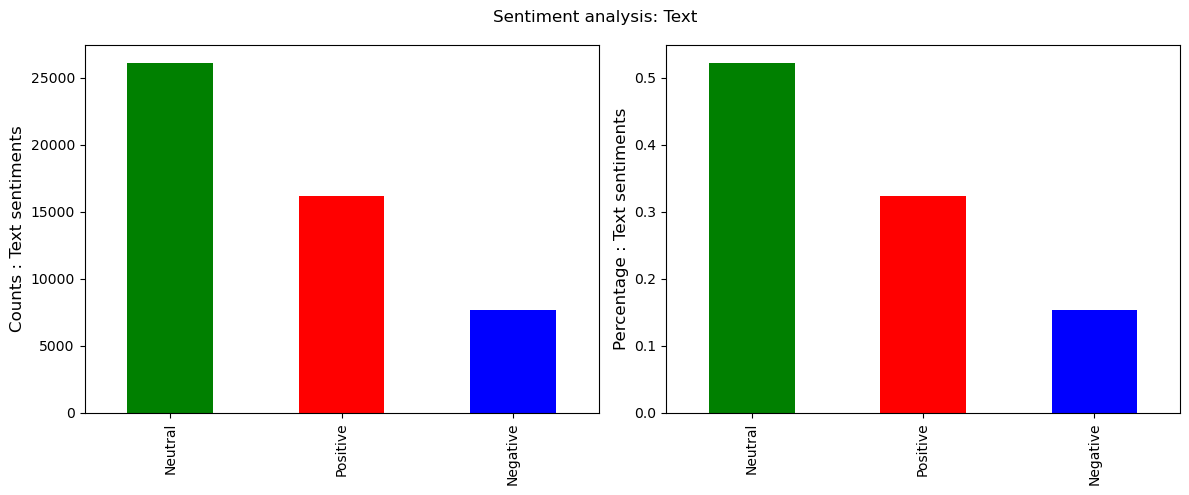

In [10]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

# Task 2

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

print(X)

  (0, 122041)	0.3779644730092272
  (0, 125649)	0.3779644730092272
  (0, 119613)	0.3779644730092272
  (0, 123990)	0.3779644730092272
  (0, 122251)	0.3779644730092272
  (0, 129061)	0.3779644730092272
  (0, 20290)	0.3779644730092272
  (1, 84517)	0.22930232680090692
  (1, 27301)	0.3681262956261017
  (1, 64904)	0.16487300501469665
  (1, 23031)	0.2110021999428155
  (1, 46199)	0.38065692456581934
  (1, 92560)	0.09314909669162727
  (1, 93611)	0.09317593836624381
  (1, 7486)	0.31490574466275484
  (1, 14426)	0.2032977216192921
  (1, 44768)	0.1694713317440784
  (1, 19673)	0.046783820770443255
  (1, 68977)	0.2207965493825925
  (1, 76170)	0.43314950642115596
  (1, 9231)	0.4125115421001737
  (2, 5121)	0.19145855646370094
  (2, 45424)	0.19145855646370094
  (2, 31345)	0.19145855646370094
  (2, 22964)	0.08428604972868649
  :	:
  (49999, 37164)	0.3109479992325482
  (49999, 88824)	0.25715718482572786
  (49999, 91958)	0.2345430143872418
  (49999, 97487)	0.2463730061555733
  (49999, 69652)	0.12799794604389

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y)

print(y_train)

[30026  3179 21010 ... 29028  5623  1414]


In [13]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (40000, 133919)
X_test shape: (10001, 133919)
y_train shape: (40000,)
y_test shape: (10001,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree Classifier
dtc = RandomForestClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('Precision:', precision_score(y_test, y_pred_dtc, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_dtc, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_dtc, average='weighted'))

# Task 3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Define the feature set
features = ['MentionedUsers']

# Create a new dataframe with the selected features
df_features = df[features]

# Define the vectorizer and fit_transform on the text data
vectorizer = TfidfVectorizer(stop_words='english')
text_vectors = vectorizer.fit_transform(df_features['MentionedUsers'])

# Add the text vectors to the feature dataframe
df_features['text_vectors'] = list(text_vectors.toarray())

# Cluster the tweets using K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(list(df_features['text_vectors']))
df_features['cluster'] = kmeans.labels_

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(list(df_features['text_vectors']), kmeans.labels_)
print('Silhouette score:', silhouette_avg)

# Print the number of tweets in each cluster
print(df_features.groupby('cluster')['Text'].count())

# Print a sample of tweets in each cluster
for i in range(3):
    print('Cluster', i, 'sample tweets:')
    print(df_features[df_features['cluster'] == i]['Text'].sample(5))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# reduce feature space to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('K-Means Clustering of Tweets')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_rfc))
print('Precision:', precision_score(y_test, y_pred_rfc, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rfc, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_rfc, average='weighted'))


In [ ]:
# Random Forest Classifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_knc))
print('Precision:', precision_score(y_test, y_pred_knc, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_knc, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_knc, average='weighted'))
